<h1>Predicting Titanic Survivor

<h2>Objectives

The main goal of this practical exercise is to develop a Random Forest and Logistic Model that uses titanic Survivor. However, Build a machine learning model that predicts whether a passenger survived the Titanic disaster based on features such as age, sex, ticket class, and more.

Workflow Stages:<br>

1) Problem Definition<br>
2) Data Collection (Training & Testing Data)<br>
3) Data Analysis to analyze, identify pattern, and explore data<br>
4) Data Cleaning to handle missing values and duplication<br>
5) Data Preprocesing and Feature Engineering (including: Encoding Categorical Variable, Normalization and Standardization if needed, and transforming or creating new feature from raw data to improve ML performance).<br>
6) Train model, Predict, and evaluate <br>
7) Fine-Tuning Paramters using GridSearchCV

<h2>Problem Definiton

We are dealing with classification problem, particulary in binary classificaiton labels. The algorithms are LogisiticRegression, RandomForest and XGBoost

<h2>Import Necessary Libraries

In [1]:
#Data analysis and Manipulation
import pandas as pd
import numpy as np
#Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

#Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")


<h2>Reading Dataset

Load the data into Dataframe by using read_csv, and then combine the dataset to run certain operation on both dataset together

In [2]:
train=pd.read_csv("../train.csv")
test=pd.read_csv("../test.csv")
y_test=pd.read_csv("../gender_submission (1).csv")["Survived"]
combine=[train,test]

We have popular python library to perform analysis, cleaning such as Numpy, Pandas and matplotlib.

<h2>Before Diving into Analysis it is important to underdant dataset

<h3>Identify the Features & Target in the dataset

In [3]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
#Display first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Display last 5 rows
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [246]:
#Get information about the dataset
train.info()
print("-"*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

Withing Categorical Variable the values can be Nominal or Ordinal<br>
Categorical Features: Name, Sex, Ticket, Cabin, Embarked<br>
<br><br>
Within Numerical features the values can be discrete or continous<br>
Numerical Features: Age & Fare (Continous), Pclass, SibSp, Parch (Discrete)<br>
Target Variable: Survived

5 features are string (object) and 7 features are interger or float for train data

The dataset contain mixed datatypes such as Ticket and Cabin

In [6]:
#check any missing values for train and test set
print(f"Train set:\n{train.isnull().sum()}")
print("-"*50)
print(f"Test set:\n{test.isnull().sum()}")

Train set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
Test set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


For Train set, the Age, Cabin, and Embarked contain missing values.<br>
for Test set, Age, Fare, and Cabin contaiin Missing values.

<h3>Data Format and Strucuture

In [7]:
#check the shape of the dataset
print(f"Train dataset shape {train.shape}")
print(f"Test dataset shape {test.shape}")

Train dataset shape (891, 12)
Test dataset shape (418, 11)


<h2>Exploratory Data Analysis

EDA is a cornerstone of data science. It is crucial to understanding and gaining insight from data

EDA is a method of analyzing dataset to understand the main charateristic of data. It involves to identify pattern, uncover underlyting strucutre, and understand the relationship between varaibles through visual and statistical technique. The main goal is to gain insight.

The workflow I would like to follow for EDA before conducting model trianing:<br><br>
1) Data Cleaning & Preprocessing: Preform data cleaning and preprocess the data to ensure it's quality and consistency.<br>
2) Summary Statistics: To understand high level of data such as central tendency and measure of dispersion.<br>
3) Data Visualization: Visualize the data to understand the pattern, relationship and distribution of the data.<br>
4) Correlation Analysis (if needed): to measure the strength and direction of relationship between varaibles.<br>
5) Feature Engineering: creating new feature from existing one to enhance the performance of the model.<br>
6) Dimensionality Reduction (if needed): Reduce the dimension of the data to visualize the high dimensional data and extract important features.

<h4>Summary Statistics

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
train.describe(include=["O"]).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


Dataset might contain outliers in Fare Variable

<h4>Data Analysis and Visualization

Data Visualization is esstential to understand the underlying structure of the data. As Data Scientist or AI engineer we must decide what chart to plot to better understand data. We visualize our data using seaborn and matplotlib libraries.

<b>It is important to seperate data into numerical and categorical feature

In [10]:
categorical_feature=train.select_dtypes("object").columns
numerical_feature=train.select_dtypes(["int","float"]).columns

Plotting the numerical feature except PassengerID, and Survived

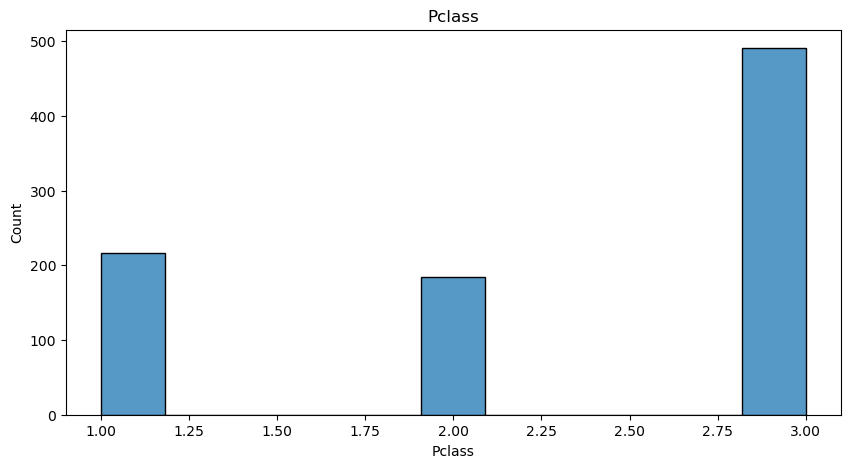

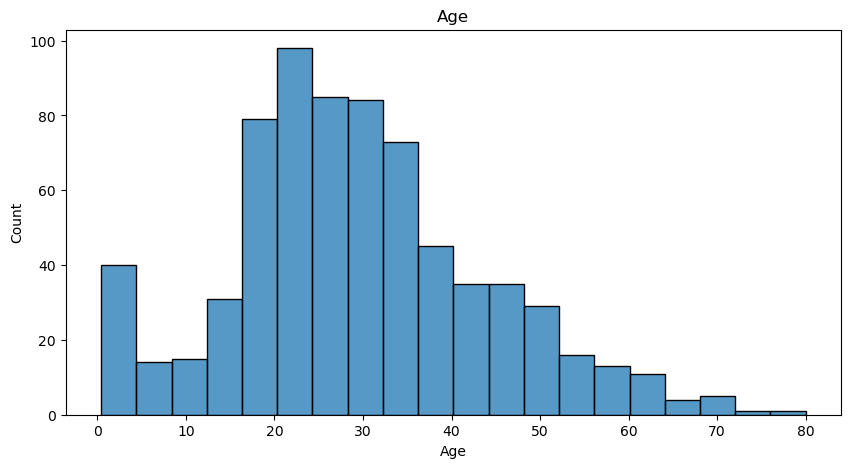

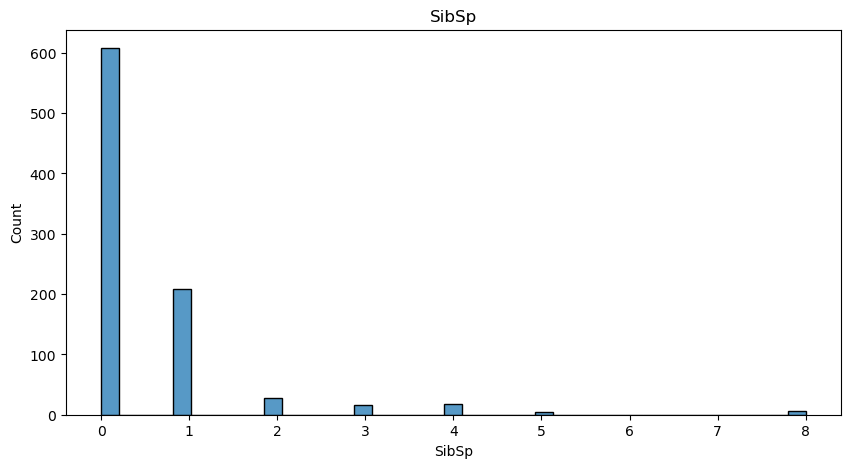

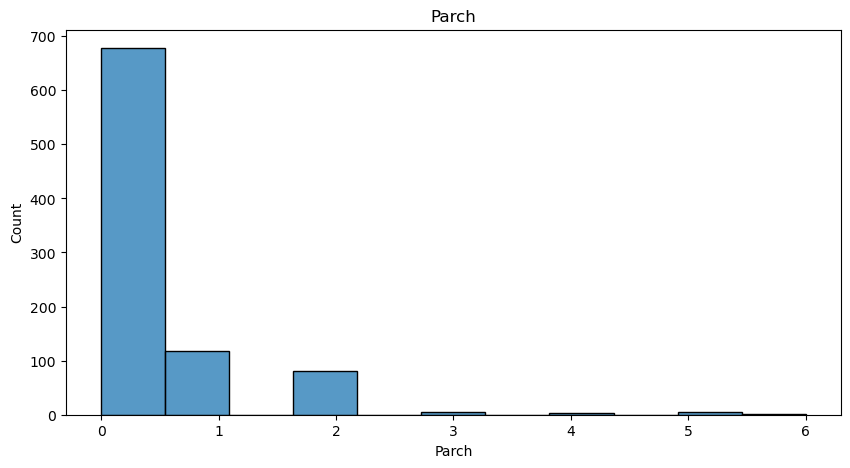

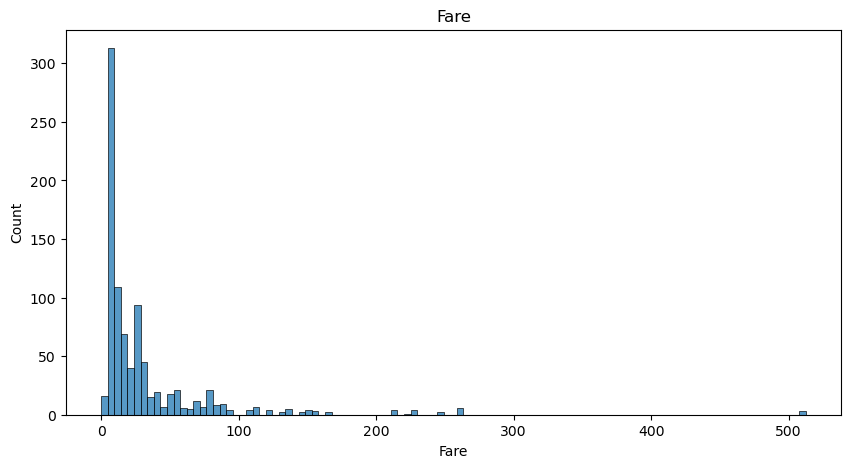

In [11]:
for num in numerical_feature[2:]:
    plt.figure(figsize=(10,5))
    sns.histplot(data=train,x=num)
    plt.title(num)

Fare is right skewed which means it contains outliers and need to be transformed.

Categorical variables can be visualized using bar chart or count plot

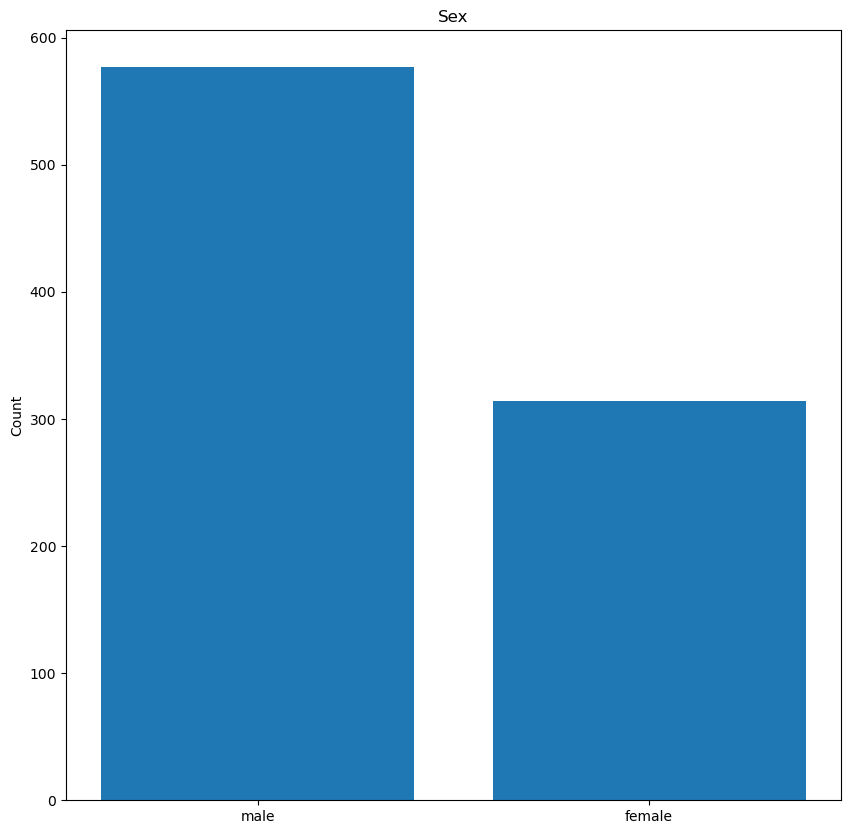

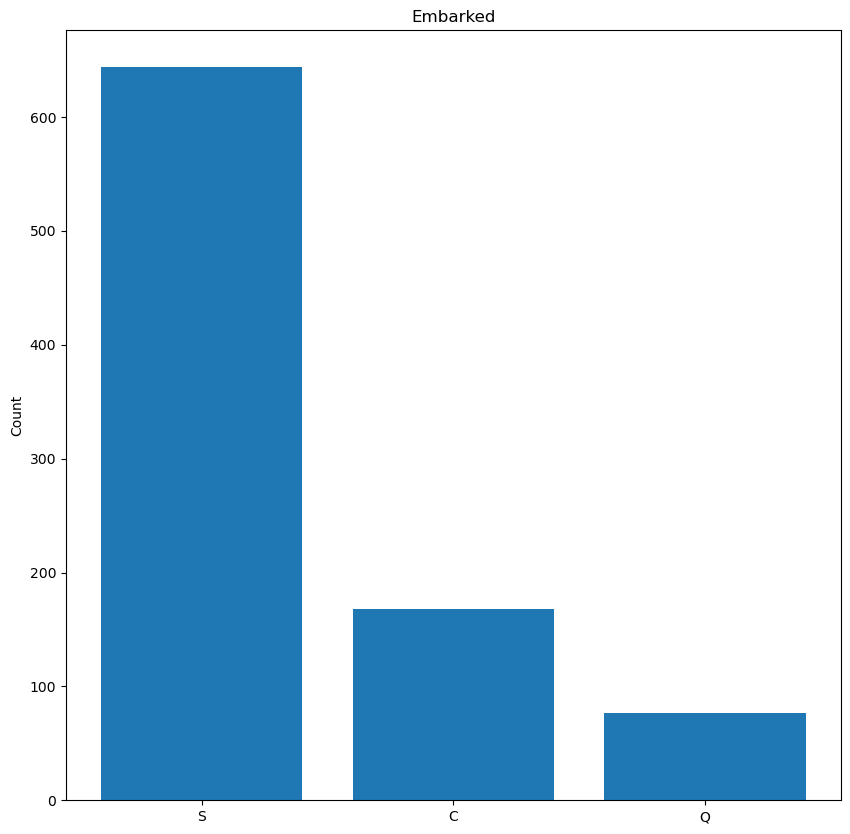

In [12]:
#plotting only Sex and Embarked
for cat in categorical_feature[1::3]:
    plt.figure(figsize=(10,10))
    count=train[cat].value_counts()
    plt.bar(count.index,count)
    plt.title(cat)
    plt.ylabel("Count")

<h3>Class Distribution

<Axes: xlabel='Survived', ylabel='Count'>

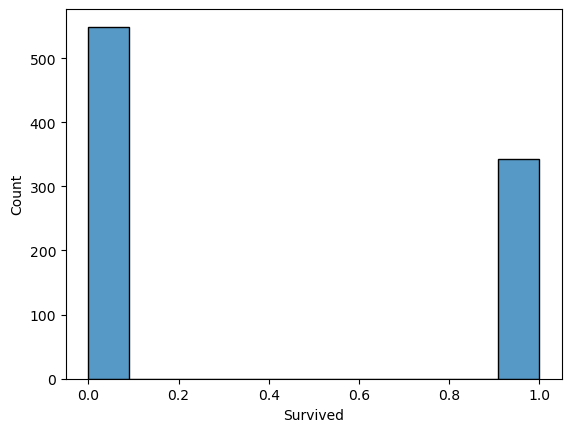

In [13]:
sns.histplot(train["Survived"])

<b>I can confirm that we have imbalance labels

<h3>Visualize survival rate across different features

In [14]:
train[["Sex","Survived"]].groupby(["Sex"]).mean().sort_values(by="Survived",ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

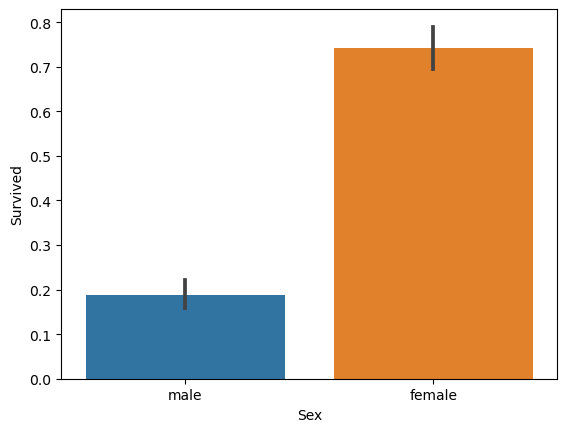

In [15]:
#Visualize survival rate acrros Sex
sns.barplot(data=train, x="Sex",y="Survived")

In [16]:
train[["Pclass","Survived"]].groupby("Pclass").mean().sort_values(by="Survived",ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

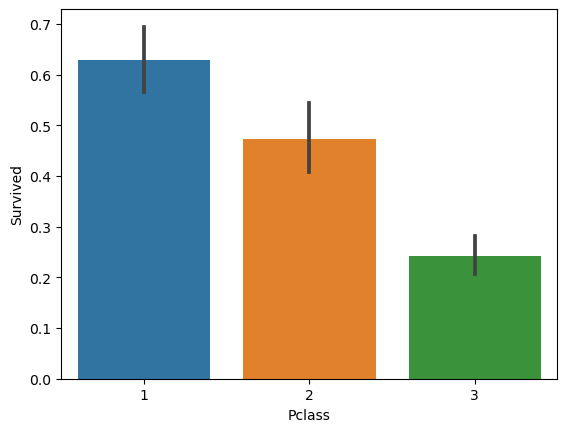

In [17]:
sns.barplot(data=train,x="Pclass",y="Survived")

<h3>Data Preprocessing and Cleaning

First, by dropping features such as Tickets, and Cabin to speed up and to reduce noise

In [18]:
for data in combine:
    data.drop(["Cabin","Ticket"],axis=1,inplace=True)



In [19]:
train.shape,test.shape

((891, 10), (418, 9))

<h3>Feature Engineering

Is the process to create a new feature from exisitng one. 

We want to extract titles from the Name feature. The RegEX (\w+\.) matches the first word which ends with dot character within Name feature. the expand=False returnd Dataframe.

In [20]:
for data in combine:
    data["Title"]=data["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
data



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,Mr


In [21]:
print(f"Unique values:\n {train.Title.unique()}")
print(train.Title.value_counts())

Unique values:
 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


We need to replace Mlle to Miss, Mme to Mrs, Ms to Miss, and others are rare

In [22]:
title_dictionary={
        "Mlle":"Miss",
        "Ms":"Miss",
        "Mme":"Mrs",
        "Countess":"Rare",
        'Lady': 'Rare',
        'Capt': 'Rare',
        'Col': 'Rare',
        'Don': 'Rare',
        'Dr': 'Rare',
        'Major': 'Rare',
        'Rev': 'Rare',
        'Sir': 'Rare',
        'Jonkheer': 'Rare',
        'Dona': 'Rare'
    }

for data in combine:
    data.Title.replace(title_dictionary,inplace=True)


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [24]:
train.Title.value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

Visualize the survival rate across title feature

<Axes: xlabel='Title', ylabel='Survived'>

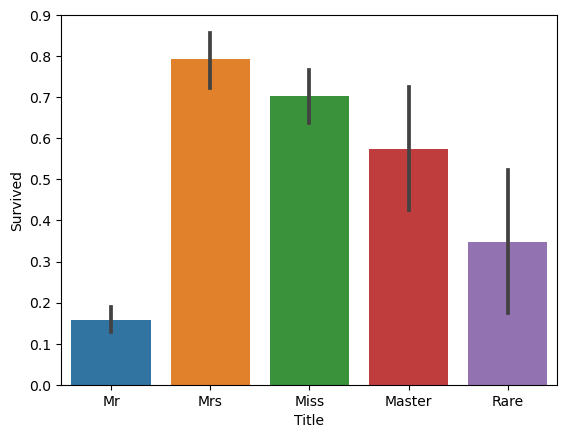

In [25]:
sns.barplot(data=train,x="Title",y="Survived")

In [26]:
train[["Title","Survived"]].groupby("Title").mean().sort_values(by="Survived",ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


<h3>Cleaning data before converting Categorical into numerical

There are many ways to impute missing values, we can impute missing values by their Mean, median, mode (most frequent) and use advanced imputation algorithms like KNN, Regularization and many other

We cannot impute the data with simple mean & median. We must need business knowledge or common insight about the data.Some data can be imputed on assumption. Note: Here I am just talking about real-world problem

In [27]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
dtype: int64

In [28]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

In [29]:
#Clean age by replacing it with median value
for data in combine:
    data.Age.fillna(data["Age"].median(),inplace=True)


In [30]:
train["Age"].isnull().sum()

0

In [31]:
test["Age"].isnull().sum()

0

In [32]:
train["Embarked"]=train["Embarked"].astype("str")
train.fillna(train["Embarked"].mode(),inplace=True)

In [33]:
test.fillna(train["Fare"].median(),inplace=True)

In [34]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [35]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

<b>The data is fully cleaned

<h3>Convert Categorical Variables into Numerical

I prefer to use Map function instead of Label Encoding or One-Hot encoding

In [36]:
title_map={
        "Mr":0,
        "Miss":1,
        "Mrs":2,
        "Master":4,
        "Rare":5
}

for data in combine:
    data["Title"]=data["Title"].map(title_map)
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,5
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,S,0


In [37]:
#Change Gender to numeric
def gender_coversion(data):
    if data=="male":
        return 0
    else:
        return 1
for data in combine:
    data["Sex"]=data["Sex"].map(gender_coversion)

<h3>Creating Age Group 

In [38]:
train["Age"].max()

80.0

In [39]:
train["AgeGroup"]=pd.cut(train["Age"],bins=5,labels=[0,18,30,50,90])

In [40]:
train[["AgeGroup","Survived"]].groupby("AgeGroup").mean().sort_values(by="Survived",ascending=False)

,Survived
AgeGroup,
0,0.550000
50,0.434783
30,0.404255
18,0.344168
90,0.090909


Let us repalce Age with ordinal values based on these bands:<br>
age between 0 to 16 = 0<br>
age between 17 to 32 = 1<br>
age between 33 to 50 = 2<br>
age between 51 to 64 = 3<br>
age > 64 =4

We can use loc to repalce values

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,0,18
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,30
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,18
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2,30
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0,30


In [42]:
for dataset in combine:
    dataset.loc[dataset["Age"]<=16,"Age"]=0
    dataset.loc[((dataset["Age"]>16) & (dataset["Age"]<=32)),"Age"]=1
    dataset.loc[((dataset["Age"]>32) & (dataset["Age"]<=50)),"Age"]=2
    dataset.loc[((dataset["Age"]>50) & (dataset["Age"]<=64)),"Age"]=3
    dataset.loc[dataset["Age"]>64,"Age"]=4

In [43]:
train["Age"]=train["Age"].astype(int)
test["Age"]=test["Age"].astype(int)

<h3>Convert Embarked into numerical varaible

In [44]:
train["Embarked"].value_counts()

Embarked
S      644
C      168
Q       77
nan      2
Name: count, dtype: int64

In [45]:
for data in combine:
    data["Embarked"]=data["Embarked"].map({"S":0,"C":1,"Q":2}).fillna(0).astype(int)


<h3>Remove Irrelevent Features Such as: PassengerID, Name, AgeGroup

In [46]:
train.drop(["PassengerId","Name","AgeGroup"],axis=1,inplace=True)

In [47]:
test.drop(["PassengerId","Name"],axis=1,inplace=True)

<h2>Model Building

We will be building multiple model, and train different model, and evaluate different model to pick best model for my dataset.<br>
Process:<br>
1) Store the models in dictionary named "models".<br>
2) Loop through dicitonary and fit each model to the training dataset<br>
3) Create an empty dicitonary to store the result

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int32  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
 7   Title     418 non-null    int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 23.0 KB


In [49]:
#Selec Training Set and test set
X_train=train.drop("Survived",axis=1)
y_train=train["Survived"]

X_test=test


In [50]:
#Ensure the shape of Training set and testing set
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((891, 8), (418, 8), (891,), (418,))

In [51]:
np.random.seed(42) #for reproducibility
models={
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier()
}

result={}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    cv=cross_val_score(model,cv=5,X=X_train,y=y_train,scoring="accuracy")
    result[name]=np.mean(cv)

In [52]:
result

{'LogisticRegression': 0.8069361621994853,
 'RandomForestClassifier': 0.8114493754315486,
 'XGBClassifier': 0.8260561170045821}

<h3>Fine-Tuninig parameter using GridsearchCV

To improve the accracy of the model we need to fine-tune paramters, I will pick RandomForest becuase it has a potential to achieve accuracy above 90%

In [73]:
forest_clf=RandomForestClassifier()

param_grid={
    "n_estimators":np.arange(50,100),
    "max_depth":np.arange(1,20),
}

grid_search_forest=GridSearchCV(forest_clf, param_grid=param_grid,cv=5,verbose=1)
grid_search_forest.fit(X_train,y_train)

Fitting 5 folds for each of 950 candidates, totalling 4750 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=1)

In [74]:
#finding the best parameters
grid_search_forest.best_params_

{'max_depth': 8, 'n_estimators': 54}

In [88]:
#Initialize the instance of RandomForest with optimal paramters to enhance the performance of the model
best_clf=RandomForestClassifier(n_estimators=58,max_depth=5)
#fit the model to the training data
best_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=58)

In [89]:
#use trained model to make prediction on test data
y_pred=best_clf.predict(X_test)

<h3>Evluation 

Because we have imabalance class, the accuracy metric is not accuracte, we should perform other classification metrics such as Recall, Precision, Confusion matrix

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       266
           1       0.90      0.89      0.89       152

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



In [91]:
precision_score(y_test,y_pred)

0.9

In [92]:
recall_score(y_test,y_pred)

0.8881578947368421

In [93]:
confusion_matrix(y_test,y_pred)

array([[251,  15],
       [ 17, 135]], dtype=int64)

In [94]:
accuracy_score(y_test,y_pred)

0.9234449760765551